In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [36]:
df=pd.read_csv("linkedin_canada.csv")
df.head()

,applicationsCount,companyId,companyName,contractType,description,experienceLevel,location,postedTime,publishedAt,salary,sector,title,workType
0,Over 200 applicants,11000395.0,Embarq,Full-time,About Embarq\n\nWe help VC-backed US startups ...,Mid-Senior level,"Quebec, Canada",2 weeks ago,2024-01-05,NaN,IT Services and IT Consulting and Software Dev...,Machine Learning Engineer,Engineering and Information Technology
1,Over 200 applicants,912833.0,Thumbtack,Full-time,A home is the biggest investment most people m...,Not Applicable,"Ontario, Canada",2 weeks ago,2024-01-05,NaN,"Technology, Information and Internet","Data Scientist, Business Analytics",Engineering and Information Technology
2,Over 200 applicants,10064814.0,Clarifai,Full-time,"About The Company\n\nClarifai is a leading, fu...",Mid-Senior level,"Montreal, Quebec, Canada",4 months ago,2023-09-15,NaN,"Technology, Information and Internet",Data Scientist,Engineering and Information Technology
3,Over 200 applicants,6637598.0,Drop,Full-time,"As a member of the Data Science team, you are ...",Not Applicable,"Toronto, Ontario, Canada",2 months ago,2023-11-15,NaN,"Transportation, Logistics, Supply Chain and St...","Data Science, Investment Research",Engineering and Information Technology
4,Over 200 applicants,2681218.0,Logikk,Full-time,Data Scientist - Computer Vision Tech Company ...,Mid-Senior level,"Montreal, Quebec, Canada",2 weeks ago,2024-01-05,NaN,IT Services and IT Consulting,Data Scientist,Engineering


In [37]:
df.columns

Index(['applicationsCount', 'companyId', 'companyName', 'contractType',
       'description', 'experienceLevel', 'location', 'postedTime',
       'publishedAt', 'salary', 'sector', 'title', 'workType'],
      dtype='object')

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 275 entries, 0 to 274
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   applicationsCount  275 non-null    object 
 1   companyId          274 non-null    float64
 2   companyName        274 non-null    object 
 3   contractType       264 non-null    object 
 4   description        275 non-null    object 
 5   experienceLevel    275 non-null    object 
 6   location           275 non-null    object 
 7   postedTime         275 non-null    object 
 8   publishedAt        270 non-null    object 
 9   salary             13 non-null     object 
 10  sector             264 non-null    object 
 11  title              275 non-null    object 
 12  workType           264 non-null    object 
dtypes: float64(1), object(12)
memory usage: 28.1+ KB


In [39]:
df["companyId"].count()

274

### The distribution of job types and roles within the datascience field

In [40]:
jobs= df["title"].value_counts()
jobs.head()

title
Machine Learning Engineer I, ML (Anywhere ML)                   15
Machine Learning Engineer II, ML (Credit Decisioning)            8
Python Engineer                                                  7
Senior Machine Learning Engineer                                 6
Senior Software Developer, Machine Learning (12 months Term)     5
Name: count, dtype: int64

In [66]:
# top ten job titles
top_ten = jobs.head(10)
top_ten

title
Machine Learning Engineer I, ML (Anywhere ML)                   15
Machine Learning Engineer II, ML (Credit Decisioning)            8
Python Engineer                                                  7
Senior Machine Learning Engineer                                 6
Senior Software Developer, Machine Learning (12 months Term)     5
Machine Learning Engineer                                        5
Data Scientist                                                   5
Software Engineer - App Stores Backend (Remote)                  4
Software Developer                                               4
Coders - AI Training [Remote]                                    3
Name: count, dtype: int64

In [68]:
top_ten.index

Index(['Machine Learning Engineer I, ML (Anywhere ML)',
       'Machine Learning Engineer II, ML (Credit Decisioning)',
       'Python Engineer', 'Senior Machine Learning Engineer',
       'Senior Software Developer, Machine Learning (12 months Term)',
       'Machine Learning Engineer', 'Data Scientist',
       'Software Engineer - App Stores Backend (Remote)', 'Software Developer',
       'Coders - AI Training [Remote]'],
      dtype='object', name='title')

In [75]:
top_ten_df = top_ten.to_frame("job_count")
top_ten_df

,job_count
title,
"Machine Learning Engineer I, ML (Anywhere ML)",15
"Machine Learning Engineer II, ML (Credit Decisioning)",8
Python Engineer,7
Senior Machine Learning Engineer,6
"Senior Software Developer, Machine Learning (12 months Term)",5
Machine Learning Engineer,5
Data Scientist,5
Software Engineer - App Stores Backend (Remote),4
Software Developer,4


In [71]:
top_ten_df.columns

Index(['count'], dtype='object')

Text(0.5, 1.0, 'Plot of Top Job Titles in Data Science in Canada')

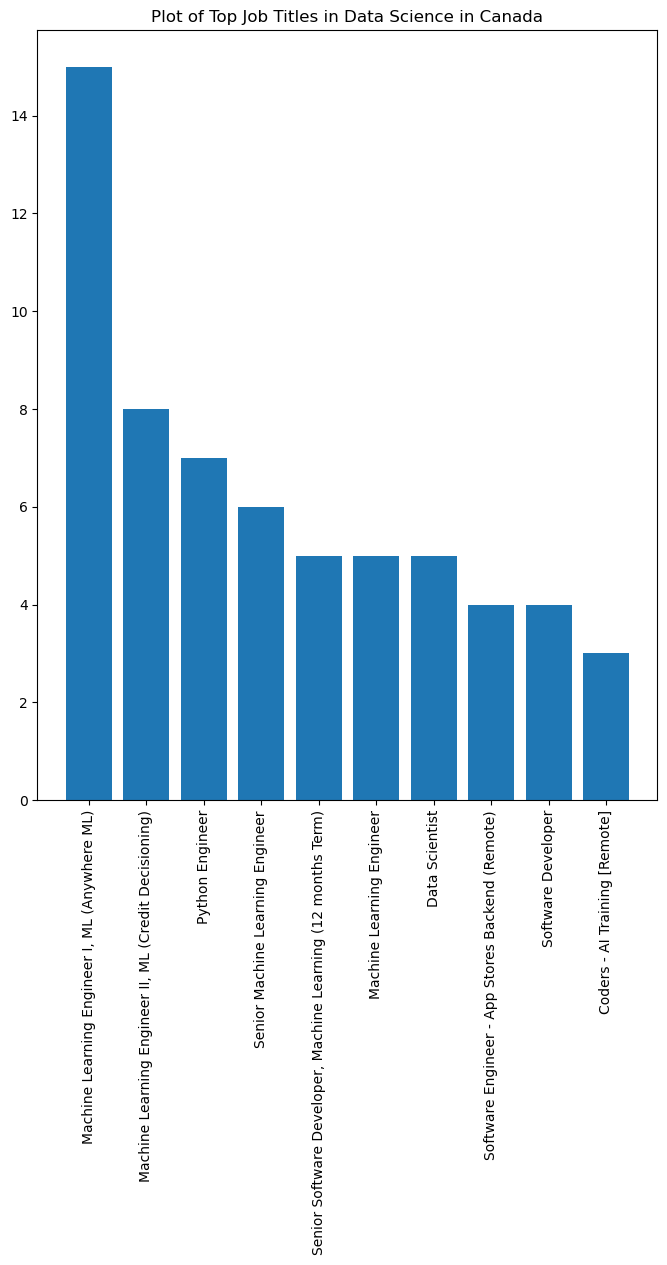

In [86]:
# Machine learning engineer make the top of the list
plt.figure(figsize=(8,10))
plt.bar(data=top_ten_df,x=top_ten_df.index,height="job_count")
plt.xticks(rotation =90)
plt.title("Plot of Top Job Titles in Data Science in Canada")

In [85]:
# Most involve roles of software engineers which should not have made the list 
bottom_five = jobs.tail()
bottom_five

title
Ruby Developer                                            1
Senior Full-Stack Developer (Remote - anywhere Canada)    1
Full Stack Engineer                                       1
Tech Lead/Full stack Developer-Canada                     1
Atlassian Systems Engineer                                1
Name: count, dtype: int64

### Identify trends in job availability across different provinces and cities

In [87]:
df.head()

,applicationsCount,companyId,companyName,contractType,description,experienceLevel,location,postedTime,publishedAt,salary,sector,title,workType
0,Over 200 applicants,11000395.0,Embarq,Full-time,About Embarq\n\nWe help VC-backed US startups ...,Mid-Senior level,"Quebec, Canada",2 weeks ago,2024-01-05,NaN,IT Services and IT Consulting and Software Dev...,Machine Learning Engineer,Engineering and Information Technology
1,Over 200 applicants,912833.0,Thumbtack,Full-time,A home is the biggest investment most people m...,Not Applicable,"Ontario, Canada",2 weeks ago,2024-01-05,NaN,"Technology, Information and Internet","Data Scientist, Business Analytics",Engineering and Information Technology
2,Over 200 applicants,10064814.0,Clarifai,Full-time,"About The Company\n\nClarifai is a leading, fu...",Mid-Senior level,"Montreal, Quebec, Canada",4 months ago,2023-09-15,NaN,"Technology, Information and Internet",Data Scientist,Engineering and Information Technology
3,Over 200 applicants,6637598.0,Drop,Full-time,"As a member of the Data Science team, you are ...",Not Applicable,"Toronto, Ontario, Canada",2 months ago,2023-11-15,NaN,"Transportation, Logistics, Supply Chain and St...","Data Science, Investment Research",Engineering and Information Technology
4,Over 200 applicants,2681218.0,Logikk,Full-time,Data Scientist - Computer Vision Tech Company ...,Mid-Senior level,"Montreal, Quebec, Canada",2 weeks ago,2024-01-05,NaN,IT Services and IT Consulting,Data Scientist,Engineering


In [89]:
df["location"].nunique()

34

In [93]:
by_location = df.groupby("location")
by_location.head()

,applicationsCount,companyId,companyName,contractType,description,experienceLevel,location,postedTime,publishedAt,salary,sector,title,workType
0,Over 200 applicants,11000395.0,Embarq,Full-time,About Embarq\n\nWe help VC-backed US startups ...,Mid-Senior level,"Quebec, Canada",2 weeks ago,2024-01-05,NaN,IT Services and IT Consulting and Software Dev...,Machine Learning Engineer,Engineering and Information Technology
1,Over 200 applicants,912833.0,Thumbtack,Full-time,A home is the biggest investment most people m...,Not Applicable,"Ontario, Canada",2 weeks ago,2024-01-05,NaN,"Technology, Information and Internet","Data Scientist, Business Analytics",Engineering and Information Technology
2,Over 200 applicants,10064814.0,Clarifai,Full-time,"About The Company\n\nClarifai is a leading, fu...",Mid-Senior level,"Montreal, Quebec, Canada",4 months ago,2023-09-15,NaN,"Technology, Information and Internet",Data Scientist,Engineering and Information Technology
3,Over 200 applicants,6637598.0,Drop,Full-time,"As a member of the Data Science team, you are ...",Not Applicable,"Toronto, Ontario, Canada",2 months ago,2023-11-15,NaN,"Transportation, Logistics, Supply Chain and St...","Data Science, Investment Research",Engineering and Information Technology
4,Over 200 applicants,2681218.0,Logikk,Full-time,Data Scientist - Computer Vision Tech Company ...,Mid-Senior level,"Montreal, Quebec, Canada",2 weeks ago,2024-01-05,NaN,IT Services and IT Consulting,Data Scientist,Engineering
...,...,...,...,...,...,...,...,...,...,...,...,...,...
258,Be among the first 25 applicants,99218917.0,Patterned Learning Career,Full-time,This is a remote position.\n\nJunior Applicati...,Entry level,"Regina, Saskatchewan, Canada",15 hours ago,NaN,NaN,IT Services and IT Consulting,Junior Application Engineer,Information Technology
260,Be among the first 25 applicants,1582639.0,CareerBeacon,Full-time,Who We Are\n\nHeadquartered in Atlantic Canada...,Entry level,"Fredericton, New Brunswick, Canada",3 weeks ago,2023-12-28,NaN,Human Resources Services,Full Stack Developer- Machine Learning and AI ...,Engineering and Information Technology
271,45 applicants,14051.0,Kinaxis,Full-time,About Kinaxis\n\nKinaxis is the global leader ...,Internship,"Québec, Quebec, Canada",1 week ago,2024-01-13,NaN,Software Development,"Co-Op/Intern Developer, DevOps",Engineering and Information Technology
273,57 applicants,14051.0,Kinaxis,Full-time,About Kinaxis\n\nKinaxis is the global leader ...,Internship,"Waterloo, Ontario, Canada",1 week ago,2024-01-13,NaN,Software Development,"Co-Op/Intern Developer, DevOps",Engineering and Information Technology
